# Классификация: SI превышает 8

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler

In [4]:
# Загрузка и подготовка
df = pd.read_excel("Данные_для_курсовои_Классическое_МО.xlsx")
df = df.drop(columns=["Unnamed: 0"], errors='ignore')
df = df.dropna(subset=["SI"])

# Целевая переменная: 1, если SI > 8
y = (df["SI"] > 8).astype(int)

# Признаки
X = df.drop(columns=["SI", "IC50, mM", "CC50, mM"], errors='ignore')
X = X.fillna(X.median(numeric_only=True))

# Нормализация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Модели
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM (RBF)": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

# Оценка
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-score": f1,
        "ROC AUC": auc
    })

# Вывод результатов
results_df = pd.DataFrame(results).sort_values(by="F1-score", ascending=False)
print(results_df)

                 Model  Accuracy  F1-score   ROC AUC
4                  KNN  0.721393  0.600000  0.743379
2    Gradient Boosting  0.726368  0.560000  0.739987
1        Random Forest  0.711443  0.553846  0.733796
0  Logistic Regression  0.676617  0.532374  0.669089
3            SVM (RBF)  0.716418  0.528926  0.726906


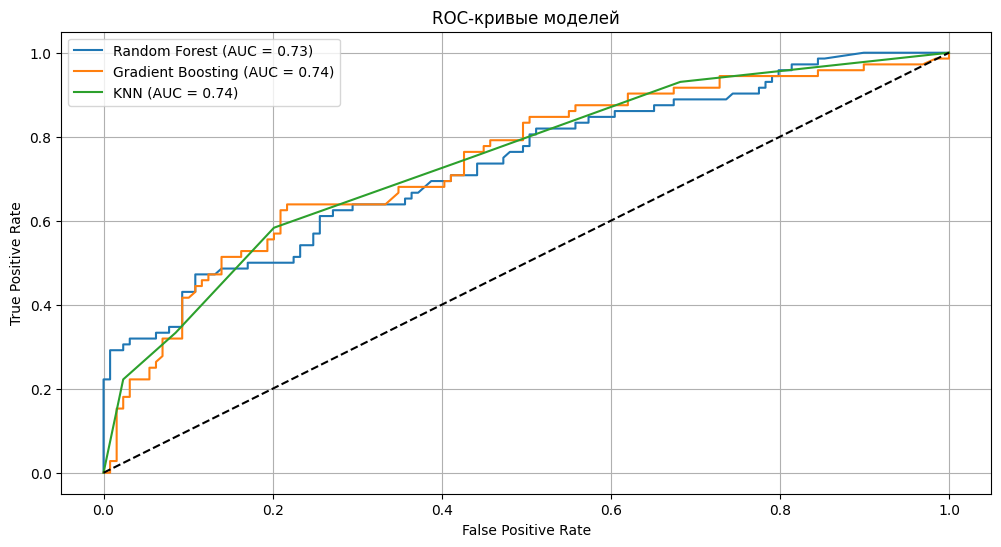

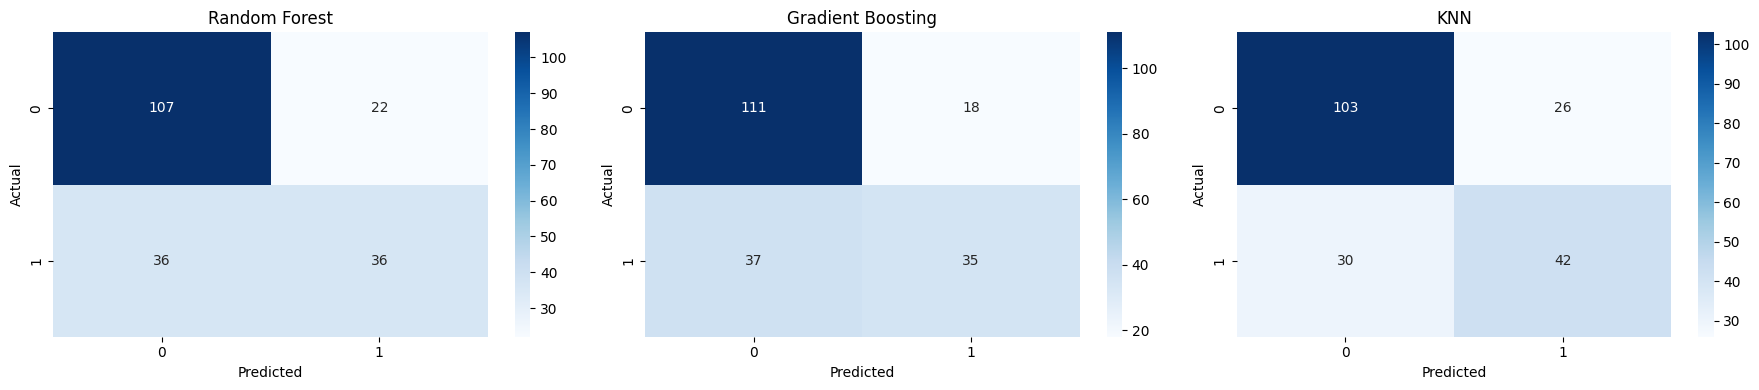

In [7]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    classification_report,
    RocCurveDisplay,
)

# Модели
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

results = {}
plt.figure(figsize=(12, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Метрики
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        "conf_matrix": cm,
        "fpr": fpr,
        "tpr": tpr,
        "roc_auc": roc_auc,
        "report": report
    }

    # ROC-кривая
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC-кривые моделей")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Матрицы ошибок
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for i, (name, res) in enumerate(results.items()):
    sns.heatmap(res["conf_matrix"], annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

# Таблица метрик
metrics_table = pd.DataFrame({
    name: {
        "Accuracy": res["report"]["accuracy"],
        "Precision": res["report"]["1"]["precision"],
        "Recall": res["report"]["1"]["recall"],
        "F1-Score": res["report"]["1"]["f1-score"],
        "AUC": res["roc_auc"]
    }
    for name, res in results.items()
}).T.round(3)

# Обучаю базовую модель KNN

In [8]:
# Обучение базовой модели
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
# Предсказания
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

# Метрики
report = classification_report(y_test, y_pred, output_dict=True)
auc_score = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

report["AUC"] = auc_score
report["conf_matrix"] = conf_matrix
report

{'0': {'precision': 0.7744360902255639,
  'recall': 0.7984496124031008,
  'f1-score': 0.7862595419847328,
  'support': 129.0},
 '1': {'precision': 0.6176470588235294,
  'recall': 0.5833333333333334,
  'f1-score': 0.6,
  'support': 72.0},
 'accuracy': 0.7213930348258707,
 'macro avg': {'precision': 0.6960415745245467,
  'recall': 0.6908914728682171,
  'f1-score': 0.6931297709923664,
  'support': 201.0},
 'weighted avg': {'precision': 0.7182728550964769,
  'recall': 0.7213930348258707,
  'f1-score': 0.7195397060499031,
  'support': 201.0},
 'AUC': np.float64(0.7433785529715763),
 'conf_matrix': array([[103,  26],
        [ 30,  42]])}

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Параметры для подбора
param_grid = {
    'n_neighbors': range(3, 21, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
print("Лучшая AUC:", grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Лучшие параметры: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Лучшая AUC: 0.7312723556463976


In [11]:
# Извлекаем лучшие параметры
best_params = grid.best_params_

# Повторное обучение на лучших параметрах
final_model = KNeighborsClassifier(**best_params)
final_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [13]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       129
           1       0.57      0.54      0.56        72

    accuracy                           0.69       201
   macro avg       0.66      0.66      0.66       201
weighted avg       0.69      0.69      0.69       201

AUC: 0.7287360034453058


# Пробую применить ансамбли

In [14]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42))
    ],
    voting='soft'  # soft = по вероятностям
)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
y_prob = ensemble.predict_proba(X_test)[:, 1]

print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

F1: 0.549618320610687
AUC: 0.7283053402239448


In [15]:
from sklearn.ensemble import StackingClassifier

base_learners = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=9))
]

meta_model = GradientBoostingClassifier(random_state=42)

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model, cv=5)
stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)
y_prob = stacking_model.predict_proba(X_test)[:, 1]

print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

F1: 0.5333333333333333
AUC: 0.7314276485788115


In [16]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
y_prob = lgb_model.predict_proba(X_test)[:, 1]

print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 285, number of negative: 515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17928
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 167
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356250 -> initscore=-0.591678
[LightGBM] [Info] Start training from score -0.591678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Визуализация для

base_learners = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=9))
]

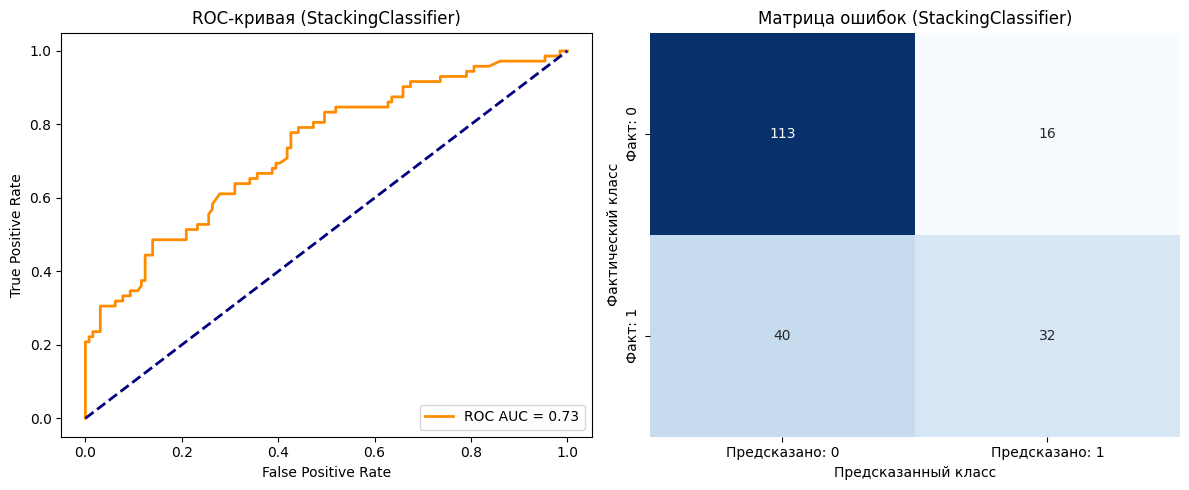

In [17]:
# Модель стекинга
base_learners = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=9))
]
meta_model = GradientBoostingClassifier(random_state=42)
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model, cv=5)
stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)
y_prob = stacking_model.predict_proba(X_test)[:, 1]

# ROC и confusion matrix
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Визуализация
plt.figure(figsize=(12, 5))

# ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая (StackingClassifier)')
plt.legend(loc="lower right")

# Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Предсказано: 0', 'Предсказано: 1'],
            yticklabels=['Факт: 0', 'Факт: 1'])
plt.title('Матрица ошибок (StackingClassifier)')
plt.ylabel('Фактический класс')
plt.xlabel('Предсказанный класс')

plt.tight_layout()
plt.show()